Code written in colabboration with Martin Hansen Skjelvareid.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.ensemble
import sklearn.svm
import pathlib
import pickle
import imblearn
import time

In [6]:
# Paths 
base_dir = pathlib.Path('/Users/siljegrue/Downloads')
train_spectra_path = base_dir / '20210825_OlbergAreaS_Spectra-2.npz'
val_spectra_path = base_dir / '20210825_OlbergAreaS_Spectra.npz'
#random_forest_save_path = base_dir / 'X_SavedModels_RF_SVM/20210825_OlbergAreaS_RandomForest_InpaintedDataset.pkl'
#svm_save_path = base_dir / 'X_SavedModels_RF_SVM/20210825_OlbergAreaS_SVM_InpaintedDataset.pkl'

In [7]:
# Load training dataset
with np.load(train_spectra_path) as npz_files:
    X_train = npz_files['X']
    y_train = npz_files['y']
print(f'{X_train.shape}')
print(f'{y_train.shape}')

(689903, 8)
(689903,)


In [8]:
# Load validation dataset
with np.load(val_spectra_path) as npz_files:
    X_val = npz_files['X']
    y_val = npz_files['y']
print(f'{X_val.shape}')
print(f'{y_val.shape}')

(3270821, 8)
(3270821,)


In [9]:
# Create a random forest model
rfc = sklearn.ensemble.RandomForestClassifier(
    n_estimators=20,            # Ensemble of 30 decision trees
    min_samples_leaf=15,        # Stop splitting data when number of samples < 15 (faster)
    max_samples=0.6)            # Use only 60% of data for each estimator (faster)


In [11]:
# Train classifier 
s_rf = time.time()
rfc.fit(X_train,y_train)
e_rf = time.time()
print("It took" ,(e_rf-s_rf)/60, "minutes to train the model")

It took 4.412376014391581 minutes to train the model


In [12]:
# save the model to file
filename_rf = 'RF_model.sav'
pickle.dump(rfc, open(filename_rf, 'wb'))

In [13]:
# Use classifier to make predictions on validation data
s_rf_pred = time.time()
y_pred_rf = rfc.predict(X_val)
e_rf_pred = time.time()
print("It took" ,(e_rf_pred-s_rf_pred)/60, "minutes to train the model")

It took 0.1823144833246867 minutes to train the model


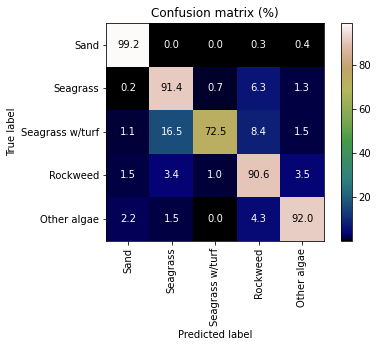

In [14]:
# Show confusion matrix
display_labels = ['Sand', 'Seagrass', 'Seagrass w/turf','Rockweed','Other algae']
confusion_matrix = sklearn.metrics.confusion_matrix(y_val,y_pred_rf,normalize='true')
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix*100,display_labels=display_labels)
disp.plot(xticks_rotation='vertical',cmap='gist_earth',values_format='.1f')
plt.title('Confusion matrix (%)')
plt.show()

Then train SVM model

In [8]:
# Create SVM model
svm = sklearn.svm.SVC(C=0.5,kernel='rbf',gamma='scale')

In [9]:
# Train SVM model
s_svm = time.time()
svm.fit(X_train,y_train)
e_svm = time.time()
print("It took" ,(e_svm-s_svm)/60, "minutes to train the model")

It took 1139.0349627017974 minutes to train the model


In [10]:
# save the model to file
import pickle
filename_svm = 'SVM_model.sav'
pickle.dump(svm, open(filename_svm, 'wb'))

In [20]:
# Use classifier to make predictions on validation data
y_pred_svm = svm.predict(X_val)

# Use classifier to make predictions on validation data
s_rf_pred = time.time()
y_pred_svm = svm.predict(X_val)
e_rf_pred = time.time()
print("It took" ,(e_rf_pred-s_rf_pred)/60, "minutes to train the model")

It took 3092.1138870636623 minutes to train the model


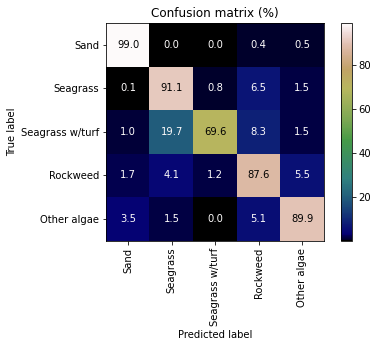

In [21]:
# Show confusion matrix
display_labels = ['Sand', 'Seagrass', 'Seagrass w/turf','Rockweed','Other algae']
confusion_matrix = sklearn.metrics.confusion_matrix(y_val,y_pred_svm,normalize='true')
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix*100,display_labels=display_labels)
disp.plot(xticks_rotation='vertical',cmap='gist_earth',values_format='.1f')
plt.title('Confusion matrix (%)')
plt.show()